In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("desafio1.csv")

In [54]:
import json
def writeOutput(outPutDict):

    with open('submission.json', 'w') as json_file:
        json.dump(outPutDict, json_file)

In [ ]:
#{"SC": {"moda": 0.0, "mediana": 0.0, "media": 0.0, "desvio_padrao": 0.0},
 #"RS": {"moda": 0.0, "mediana": 0.0, "media": 0.0, "desvio_padrao": 0.0}, 
 #"PR": {"moda": 0.0, "mediana": 0.0, "media": 0.0, "desvio_padrao": 0.0}}

In [3]:
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [58]:
d = {}

for i in df['estado_residencia'].unique():
    temp = {}
    
    a = df[df['estado_residencia'] == i]    
    pontC = a['pontuacao_credito']
    
    print (i)
    print('')
    print('amostras', pontC.count())
    print("media",np.mean(pontC))
    print("mediana",np.median(pontC))
    print("moda",stats.mode(pontC)[0][0])
    print("std",np.std(pontC))
    
    temp['media'] = float(np.mean(pontC))
    temp['mediana'] = float(np.median(pontC))
    temp['moda'] = float(stats.mode(pontC)[0][0])
    temp['desvio_padrao'] = float(np.std(pontC))
    
    d[i] = temp
    

SC

amostras 3519
media 649.5376527422563
mediana 653.0
moda 850
std 97.21967631126118
RS

amostras 1750
media 651.1051428571428
mediana 650.0
moda 850
std 95.10941264433832
PR

amostras 1731
media 648.9612940496822
mediana 650.0
moda 850
std 98.57869907560782


In [59]:
d

{'SC': {'media': 649.5376527422563,
  'mediana': 653.0,
  'moda': 850.0,
  'desvio_padrao': 97.21967631126118},
 'RS': {'media': 651.1051428571428,
  'mediana': 650.0,
  'moda': 850.0,
  'desvio_padrao': 95.10941264433832},
 'PR': {'media': 648.9612940496822,
  'mediana': 650.0,
  'moda': 850.0,
  'desvio_padrao': 98.57869907560782}}

In [60]:
writeOutput(d)

In [13]:
df[df['estado_residencia']=='RS']['pontuacao_credito'].describe()

count    1750.000000
mean      651.105143
std        95.136598
min       350.000000
25%       585.000000
50%       650.000000
75%       717.000000
max       850.000000
Name: pontuacao_credito, dtype: float64

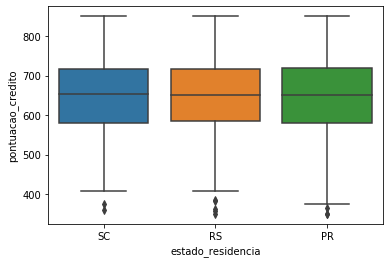

In [15]:
sns.boxplot(x = 'estado_residencia', y = 'pontuacao_credito',  data = df)

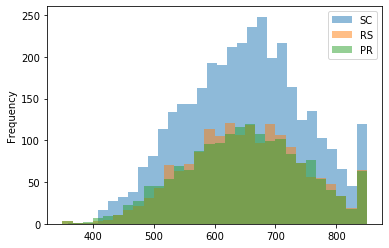

In [64]:
plt.figure()
for i in df['estado_residencia'].unique():
    df[df['estado_residencia']==i]['pontuacao_credito'].plot.hist(bins = 30, alpha =0.5,label = i)
plt.legend()
plt.show()